**Melbourne housing market dataset**

The Melbourne housing market dataset contains a wealth of information about the properties sold in Melbourne, Australia between January 2016 and December 2018.

The dataset includes 21 columns, each providing different information about the properties, such as their location, size, number of rooms, type of property, and price. Some columns contain continuous numerical data, such as 'Price', 'Distance', 'Landsize', and 'BuildingArea', while others contain categorical data, such as 'Suburb', 'Type', 'Method', 'Regionname', and 'CouncilArea'.

Understanding the information contained in each column is essential for conducting exploratory data analysis on the dataset and gaining insights into the Melbourne housing market.

**Dataset columns:**

**Suburb:** The suburb where the property is located  
**Address:** The street address of the property  
**Rooms:** The number of rooms in the property  
**Type:** The type of the property (house, townhouse, unit, etc.)  
**Price:** The price at which the property was sold  
**Method:** The method of sale (auction, private treaty, etc.)  
**SellerG:** The agency or agent who sold the property  
**Date:** The date on which the property was sold  
**Distance:** The distance of the property from Melbourne's central business district (CBD) in kilometers  
**Postcode:** The postcode of the suburb where the property is located  
**Bedroom2:** The number of bedrooms in the property (other than the master bedroom)  
**Bathroom:** The number of bathrooms in the property  
**Car:** The number of car spaces in the property  
**Landsize:** The size of the land on which the property is located in square meters  
**BuildingArea:** The size of the building on the land in square meters  
**YearBuilt:** The year in which the building was constructed  
**CouncilArea:** The local government area in which the property is located  
**Lattitude:** The latitude coordinate of the property  
**Longtitude:** The longitude coordinate of the property  
**Regionname:** The general region in Melbourne (west, north, south-east, etc.)  
**Propertycount:** The number of properties in the suburb.  


Download the Melbourne Housing dataset from here: https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [5]:
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
melbourne_data = pd.read_csv(url)
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [25]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

**Question**

Before answering the following questions, cast the price column in the Melbourne housing market dataset to an integer type and remove any null values in the price column. Which of the following statements is true regarding dropping null values in the price column?

A. Dropping all null values will lead to a loss of 74% of the data

B. Dropping null values will not affect the data in the "price" column since it has no null values

C. Dropping all null values will lead to a loss of 21% of the data

D. Dropping null values will lead to a loss of only 6% of the data, as the "price" column has a low percentage of null values

In [7]:
# Cast the price column to integer type
melbourne_data['Price'] = pd.to_numeric(melbourne_data['Price'], errors='coerce')

In [11]:
# number of values before droppping NAs
num_before_drop_na = melbourne_data.shape[0]
num_before_drop_na

34857

In [12]:
# remove null values
melbourne_data = melbourne_data.dropna(subset=['Price'])

In [13]:
# number of values after droppping NAs
num_after_drop_na = melbourne_data.shape[0]
num_after_drop_na

27247

In [14]:
(num_before_drop_na - num_after_drop_na)/num_before_drop_na * 100

21.83205668875692

**Answer:** C. Dropping all null values will lead to a loss of 21% of the data

**What is the most common type of property, and what percentage of the properties does it represent? (h - house; u - unit; t - townhouse;)**

A. The most common type of property is houses and they represent 54% of the properties

B. The most common type of property is units and they represent 54% of the properties

C. The most common type of property is units, and they represent 67% of the properties

D. The most common type of property is houses, and they represent 67% of the properties

In [15]:
# Calculate the most common type of property and its percentage
property_counts = melbourne_data['Type'].value_counts()
most_common_type = property_counts.idxmax()
most_common_percentage = (property_counts.max() / property_counts.sum()) * 100

most_common_type, most_common_percentage

('h', 67.79461959114765)

**Answer:** D. The most common type of property is houses, and they represent 67% of the properties

**Question**
Create a graph to show the frequency of each property type in descending order. Which graph technique is the most suitable and straightforward approach for this task?

A. Countplot

B. Boxplot

C. Scatterplot

D. Histogram

E. Barplot

**Answer:** E. Barplot

**Question**
How does the number of rooms impact the median property price? Represent this relationship using a bar chart.

A. The median property price generally increases with the number of rooms, but there are some exceptions where the price decreases or remains the same

B. The median property price increases with the number of rooms up to a certain point, after which it begins to decrease

C. There is no clear relationship between the number of rooms and the median property price in the Melbourne housing market dataset

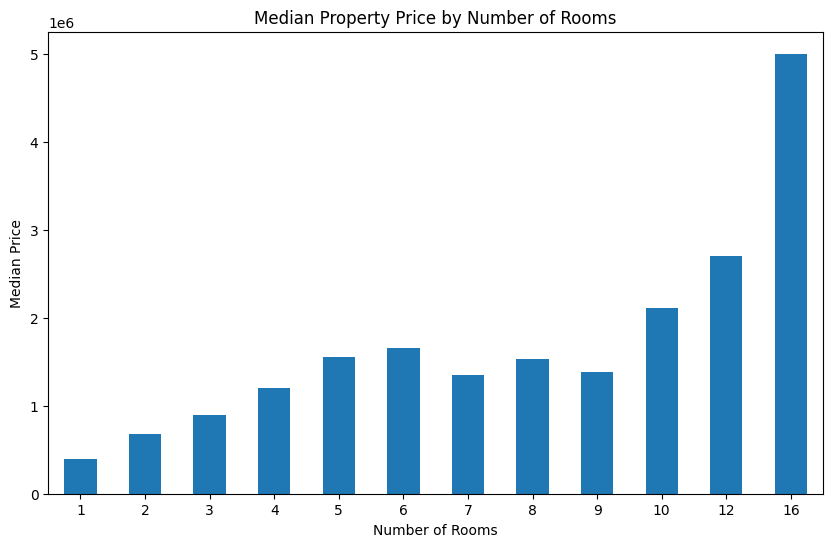

In [23]:
# Create a bar chart to represent this relationship
plt.figure(figsize=(10, 6))

# Calculate the median property price for each number of rooms
median_price_per_room = melbourne_data.groupby('Rooms')['Price'].median().sort_index()
median_price_per_room.plot(kind='bar')

# plt.bar(melbourne_data['Rooms'], median_price_per_room)
plt.title('Median Property Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.show()

# median_price_per_room

**Answer:** A. The median property price generally increases with the number of rooms, but there are some exceptions where the price decreases or remains the same

**Question**
Since the relationship between property price and number of rooms may not be linear, it is appropriate to use a non-parametric correlation coefficient such as Spearman's to determine the strength of the relationship. Calculate the Spearman correlation coefficient to analyze the relationship between price and number of rooms.

A. There is no correlation between property price and number of rooms

B. The correlation between property price and number of rooms is weak

C. The correlation between property price and number of rooms is moderate

D. The correlation between property price and number of rooms is strong

In [24]:
# Calculating the Spearman rank correlation between 'Price' and 'number of room' 
correlation = melbourne_data['Price'].corr(melbourne_data['Rooms'], method='spearman')
correlation

0.5042971590926004

**Answer:** C. The correlation between property price and number of rooms is moderate

**Question**
Is there a relationship between the distance from the Central Business District (CBD) and the property price? Use a scatter plot to visualize the relationship and calculate a correlation coefficient to determine the strength and direction of the correlation.

A. There is a weak negative correlation between the distance from CBD and the property price

B. There is a moderate negative correlation between the distance from CBD and the property price

C. There is no correlation between the distance from CBD and the property price

D. There is a weak positive correlation between the distance from CBD and the property price

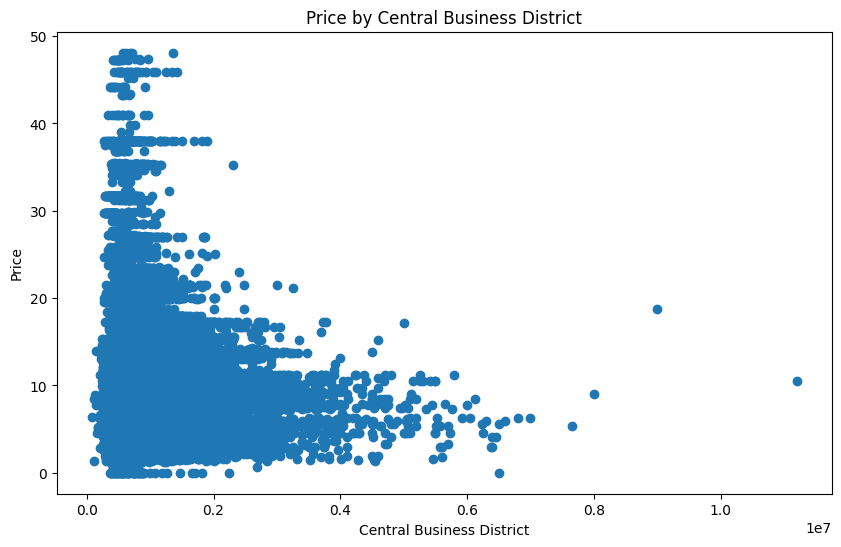

In [26]:
# Create a scatter chart to represent this relationship
plt.figure(figsize=(10, 6))

plt.scatter(melbourne_data['Price'], melbourne_data['Distance'])
plt.title('Price by Central Business District')
plt.xlabel('Central Business District')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

Calculate a correlation coefficient to determine the strength and direction of the correlation.

In [27]:
# Calculating the Pearson correlation coefficient between 'Price' and 'CBD' columns
correlation = melbourne_data['Price'].corr(melbourne_data['Distance'])
correlation

-0.21138434279158289

**Answer:** A. There is a weak negative correlation between the distance from CBD and the property price

**Question**
Is there a relationship between the property size and the property price?

A. There is a weak positive linear relationship between property size and property price

B. There is a weak positive correlation between the two variables, but the relationship may not be linear

C. There is a moderate positive linear relationship between property size and property price

D. There is no relationship between property size and property price

In [28]:
# Calculating the Pearson correlation coefficient between 'Price' and 'Size' columns
correlation = melbourne_data['Price'].corr(melbourne_data['BuildingArea'])
correlation

0.10075363947310159

**Answer:** B. There is a weak positive correlation between the two variables, but the relationship may not be linear


**Question**
When looking visually at the relationship between land size and property price, a scatter plot might not be the most informative way to visualize this relationship (try it!). Instead, we can use a quantile-based discretization function to categorize the Landsize variable and create a bar plot. When using q=7, how does the relationship between land size and median property price change compared to using a lower quantile value?

A. The relationship between land size and property price remains the same when using q=7 compared to a lower quantile value

B. The relationship between land size and property price becomes more pronounced when using q=7 compared to a lower quantile value

C. The frequency of properties with a larger land size having a lower price than properties with a smaller land size increases when using q=7 compared to a lower quantile value

D. The frequency of properties with a larger land size having a lower price than properties with a smaller land size decreases when using q=7 compared to a lower quantile value

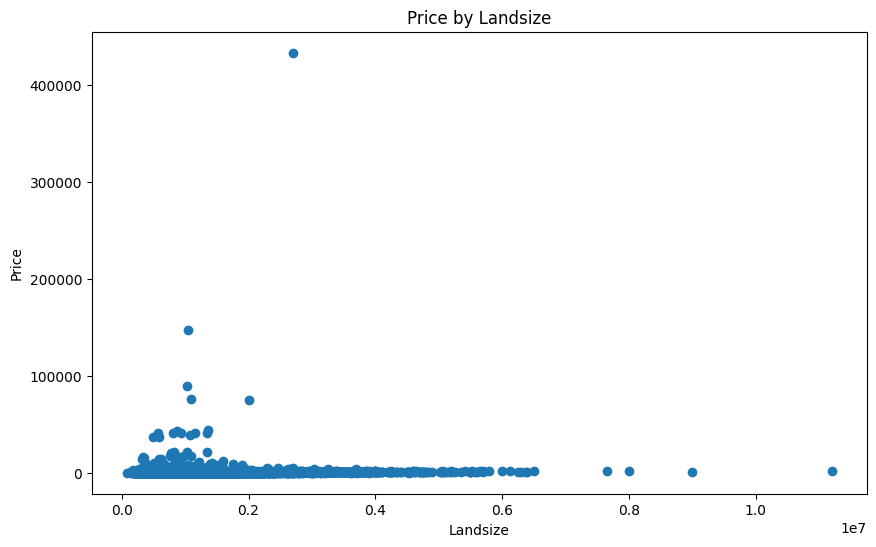

In [29]:
# Create a scatter chart to represent this relationship
plt.figure(figsize=(10, 6))

plt.scatter(melbourne_data['Price'], melbourne_data['Landsize'])
plt.title('Price by Landsize')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

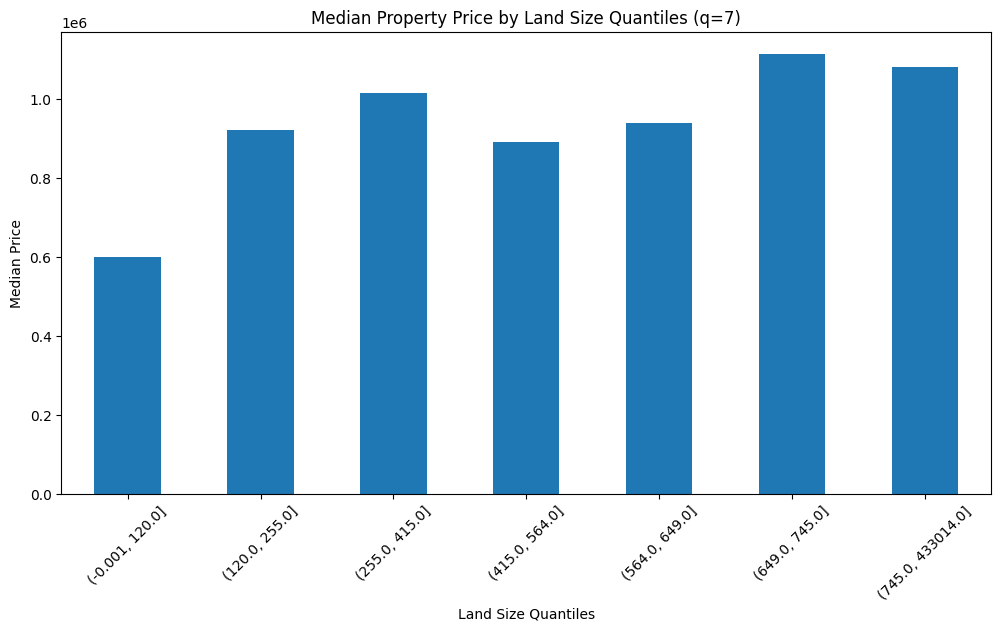

Landsize
(-0.001, 120.0]       600000.0
(120.0, 255.0]        920000.0
(255.0, 415.0]       1014000.0
(415.0, 564.0]        890000.0
(564.0, 649.0]        940000.0
(649.0, 745.0]       1115000.0
(745.0, 433014.0]    1080000.0
Name: Price, dtype: float64

In [31]:
# Categorize the 'Landsize' variable using q=7 quantiles
melbourne_data['Landsize'] = pd.qcut(melbourne_data['Landsize'], q=7, duplicates='drop')

# Calculate the median property price for each quantile
median_price_per_quantile = melbourne_data.groupby('Landsize')['Price'].median().sort_index()

# Create a bar plot to represent this relationship
plt.figure(figsize=(12, 6))
median_price_per_quantile.plot(kind='bar')
plt.title('Median Property Price by Land Size Quantiles (q=7)')
plt.xlabel('Land Size Quantiles')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

median_price_per_quantile


**Answer:** B. The relationship between land size and property price becomes more pronounced when using q=7 compared to a lower quantile value


**Question**
Does the dataset contain any properties that are priced significantly above or below the average? To investigate, create a box plot to detect potential outliers, and use Tukey's method with a 1.5 threshold to create a new dataframe without these outliers. What percentage of properties are identified as outliers using Tukey's method?

A. 0.69%

B. 1.69%

C. 3.69%

D. 4.69%

In [32]:
# Calculate the first and third quartiles (Q1 and Q3) and the interquartile range (IQR)
Q1 = melbourne_data['Price'].quantile(0.25)
Q3 = melbourne_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds using Tukey's method with a 1.5 threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = melbourne_data[(melbourne_data['Price'] < lower_bound) | (melbourne_data['Price'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(melbourne_data)) * 100

percentage_outliers

4.690424633904651

**Answer:** D.4.69%

**Question**
How is the property price distribution? Create a QQ plot to compare the distribution of property prices to a normal distribution visually, and calculate the skew and kurtosis to get a better understanding of the shape of the distribution analytically.

A. The property price distribution is positively skewed

B. The property price distribution is negatively skewed

C. The property price distribution is normally distributed

D. The property price distribution is bimodal

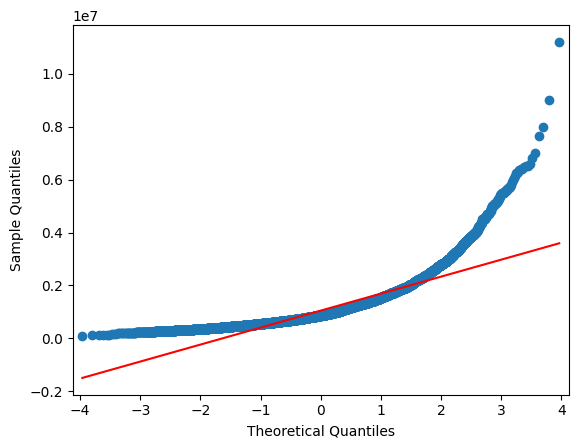

In [34]:
# Generating a Q-Q plot for 'Price' to check if its distribution follows a normal distribution
sm.qqplot(melbourne_data['Price'], line='s');

In [35]:
# Calculate skew and kurtosis
skewness = melbourne_data['Price'].skew()
kurtosis = melbourne_data['Price'].kurt()

skewness, kurtosis

(2.5889693410528594, 13.097200515556374)

**Answer:** A. The property price distribution is positively skewed

**Question** What is the outcome of performing a normality test, such as the Kolmogorov-Smirnov test, on the distribution of property prices? Specifically, what possible conclusions can be drawn from the test results regarding the similarity of the distribution to a normal distribution?

A. The test results indicate that the distribution of property prices in the Melbourne housing market dataset is significantly different from a normal distribution

B. The test results indicate that the distribution of property prices in the Melbourne housing market dataset is not significantly different from a normal distribution

C. The test results indicate that the distribution of property prices in the Melbourne housing market dataset is slightly different from a normal distribution, but the difference is not significant

D. The test results indicate that the distribution of property prices in the Melbourne housing market dataset is normal, and there is no need to perform additional tests

In [37]:
# Conducting the Kolmogorov-Smirnov test for normality on 'Price'
# First, we need to standardize the data to have mean 0 and variance 1 since we're comparing against a standard normal distribution
standardized_saleprice = (melbourne_data['Price'] - melbourne_data['Price'].mean()) / melbourne_data['Price'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(0.1375128495378416, 0.0)

In [38]:
# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


**Answer:** A. The test results indicate that the distribution of property prices in the Melbourne housing market dataset is significantly different from a normal distribution

**Question** How do property prices differ between different property types? Create a box plot to show the distribution of property prices for each property type?

A. There are no significant differences in property prices between different property types

B. Houses have higher property prices than units and townhouses

C. Units have higher property prices than houses and townhouses

D. Townhouses have higher property prices than houses and units

/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_32408/1123510990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melbourne_data, x='Type', y='Price', palette="coolwarm")


<Axes: xlabel='Type', ylabel='Price'>

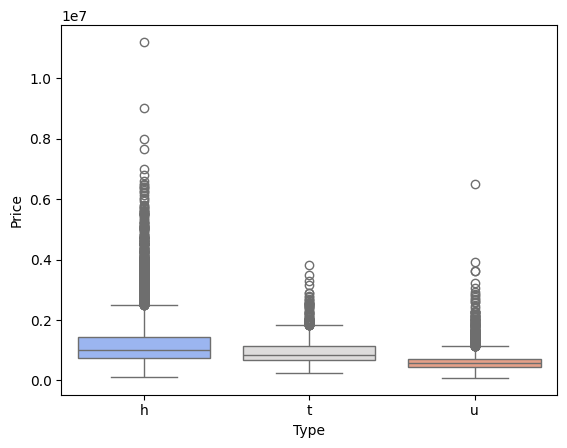

In [40]:
# Plotting a box plot to visualize the spread and outliers of 'Price' for each 'property Type' category
sns.boxplot(data=melbourne_data, x='Type', y='Price', palette="coolwarm")

**Answer:** B. Houses have higher property prices than units and townhouses.

**Question** What is the region with the highest median price? Conversely, which region has the lowest median price?

A. Most expensive: Western Victoria, Cheapest: Southern Metropolitan

B. Most expensive: Southern Metropolitan, Cheapest: Western Victoria

C. Most expensive: Northern Metropolitan, Cheapest: Eastern Victoria

D. Most expensive: Eastern Victoria, Cheapest: Northern Metropolitan

In [51]:
# melbourne_data['Regionname'].sort_index
median_price_per_region = melbourne_data.groupby('Regionname')['Price'].median().sort_values(ascending=False)
median_price_per_region

Regionname
Southern Metropolitan         1250000.0
Eastern Metropolitan          1015000.0
South-Eastern Metropolitan     811250.0
Northern Metropolitan          752500.0
Western Metropolitan           750000.0
Eastern Victoria               679000.0
Northern Victoria              565000.0
Western Victoria               412125.0
Name: Price, dtype: float64

**Answer:** B. Most expensive: Southern Metropolitan, Cheapest: Western Victoria

**Question**
Is there a statistically significant association between the region (Regionname) and the price of properties? Use chi square test to assess the independence between region and price and Cramer's V coefficient to quantify the strength of the association between these two features.

It's worth noting that in order to perform this analysis, both features need to be categorical. Divide the price variable into five distinct ranges.

Use Cohen (1988) interpretation on Cramer's V, which depends on the degrees of freedom

A. Yes, there is a significant relationship between the region (Regionname) and the price of properties, and the relationship is medium

B. Yes, there is a significant relationship between the region (Regionname) and the price of properties, and the relationship is strong

C. No, there is no significant relationship between the region (Regionname) and the price of properties

D. None of the above

In [52]:
# Divide the price variable into five distinct ranges (quintiles)
price_bins = pd.qcut(melbourne_data['Price'], q=5, labels=False)

# Add the binned price data to the dataframe
melbourne_data['Price_Binned'] = price_bins

# Create a contingency table for Regionname and Price_Binned
contingency_table = pd.crosstab(melbourne_data['Regionname'], melbourne_data['Price_Binned'])

# Perform the chi-square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
cramers_v = (chi2 / (n * (min(contingency_table.shape) - 1))) ** 0.5

chi2, p, cramers_v


(5728.727443613416, 0.0, 0.2292786672838293)

**Answer:** A. Yes, there is a significant relationship between the region (Regionname) and the price of properties, and the relationship is medium.

**Question**
How much was the percentage increase or decrease in median price of properties sold between the earliest year and the latest year (Date column)?

A. 5.48%

B. 10.37%

C. -5.48%

D. -10.37%

In [87]:
# Convert the 'Date' column to datetime format
melbourne_data['Date'] = pd.to_datetime(melbourne_data['Date'], format='%d/%m/%Y')

# Extract the earliest and latest year from the 'Date' column
earliest_year = melbourne_data['Date'].min().year
latest_year = melbourne_data['Date'].max().year

# Calculate the median price for the earliest and latest year
median_price_earliest_year = melbourne_data[melbourne_data['Date'].dt.year == earliest_year]['Price'].median()
median_price_latest_year = melbourne_data[melbourne_data['Date'].dt.year == latest_year]['Price'].median()

# Calculate the percentage change
percentage_change = ((median_price_latest_year - median_price_earliest_year) / median_price_earliest_year) * 100

earliest_year, latest_year, median_price_earliest_year, median_price_latest_year, percentage_change


(2016, 2018, 885000.0, 836500.0, -5.480225988700565)

**Answer:** Closest answer is A

**Questio**
Is there a specific month during which more houses are sold?

A. January

B. March

C. October

D. November



In [89]:
# Extract Month and create a new column
melbourne_data['Month'] = melbourne_data['Date'].dt.month
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_Binned,Month
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,"(120.0, 255.0]",NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,4,12
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,"(120.0, 255.0]",79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,3,2
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,"(120.0, 255.0]",150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4,3
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,"(-0.001, 120.0]",NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,2,3
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,"(-0.001, 120.0]",142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4,6


In [99]:
# Calculate the number of houses sold in each month
houses_sold_per_month = melbourne_data['Month'].value_counts().sort_index()

houses_sold_per_month

1      649
2     2067
3     2362
4     1206
5     2620
6     2425
7     2359
8     2324
9     3219
10    3118
11    3408
12    1490
Name: Month, dtype: int64

In [100]:
# Map month numbers to month names for better readability
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
houses_sold_per_month.index = houses_sold_per_month.index.map(months)

houses_sold_per_month

January       649
February     2067
March        2362
April        1206
May          2620
June         2425
July         2359
August       2324
September    3219
October      3118
November     3408
December     1490
Name: Month, dtype: int64

In [102]:
houses_sold_per_month.sort_values(ascending=True)

January       649
April        1206
December     1490
February     2067
August       2324
July         2359
March        2362
June         2425
May          2620
October      3118
September    3219
November     3408
Name: Month, dtype: int64

**Answer:** November